## 1. Develop programs for following spatial filtering operations on a gray scale image.

## a. Averaging

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = plt.imread("easter.jpg")

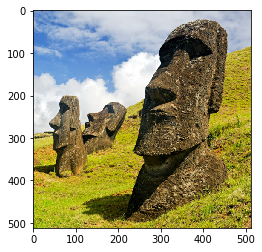

(512, 512, 3)

In [3]:
plt.imshow(img, cmap=plt.cm.bone)
plt.show()
img.shape

In [4]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

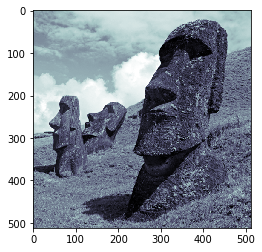

(512, 512)

In [5]:
plt.imshow(image, cmap=plt.cm.bone)
plt.show()
image.shape

In [6]:
row,col = image.shape

In [7]:
def average_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = result.sum()
             
    plt.imshow(res, cmap=plt.cm.bone)

#### Window Size: 3X3

In [8]:
mask1 = np.ones((3,3))/9

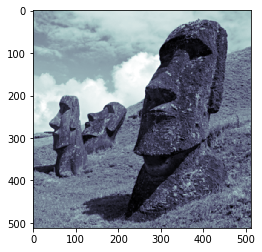

In [9]:
average_filtering(image,mask1)

#### Window Size: 5X5

In [10]:
mask2 = np.ones((5,5))/25

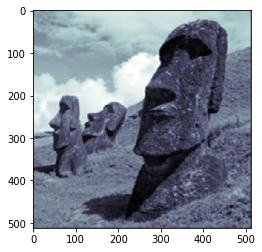

In [11]:
average_filtering(image,mask2)

#### Window Size: 7X7

In [12]:
mask3 = np.ones((7,7))/49

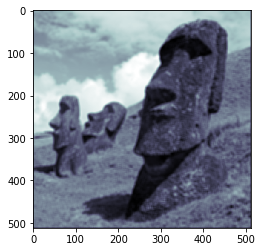

In [13]:
average_filtering(image,mask3)

#### Window Size: 9X9

In [14]:
mask4 = np.ones((9,9))/81

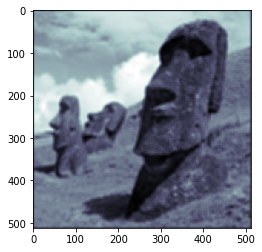

In [15]:
average_filtering(image,mask4)

## b. Weighted averaging

In [16]:
w_mask3 = np.matrix([[1,2,1],[2,4,2],[1,2,1]])/16                  #3X3 Gaussian Filter

In [17]:
w_mask3

matrix([[0.0625, 0.125 , 0.0625],
        [0.125 , 0.25  , 0.125 ],
        [0.0625, 0.125 , 0.0625]])

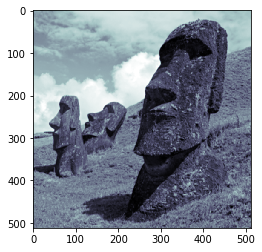

In [18]:
average_filtering(image, w_mask3)

In [19]:
w_mask5 = np.matrix([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])/273     #5X5 Gaussian Filter

In [20]:
w_mask5

matrix([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
        [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
        [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
        [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
        [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])

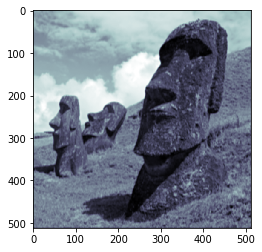

In [21]:
average_filtering(image, w_mask5)

## c. Median filtering

In [22]:
def median_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = np.median(result)
             
    plt.imshow(res, cmap=plt.cm.bone)

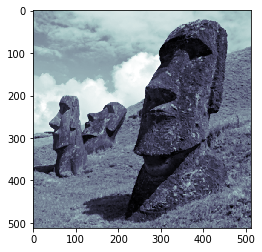

In [23]:
onemask3 = np.ones((3,3))

median_filtering(image,onemask3)     #3X3 Window Size

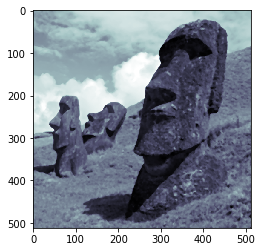

In [24]:
onemask5 = np.ones((5,5))

median_filtering(image,onemask5)     #5X5 Window Size

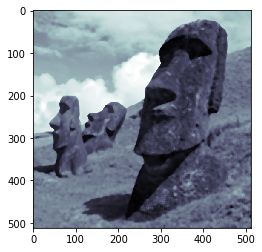

In [25]:
onemask7 = np.ones((7,7))

median_filtering(image,onemask7)     #7X7 Window Size

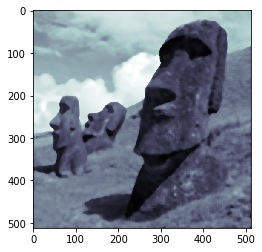

In [26]:
onemask9 = np.ones((9,9))

median_filtering(image,onemask9)     #9X9 Window Size

## d. Max filtering

In [27]:
def max_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = np.amax(result)
             
    plt.imshow(res, cmap=plt.cm.bone)

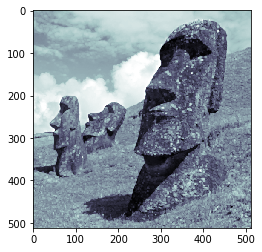

In [28]:
max_filtering(image, onemask3)       #3X3

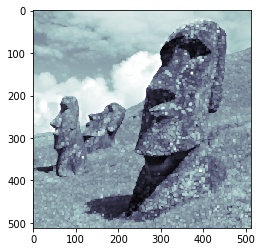

In [29]:
max_filtering(image,onemask5)        #5X5

## e. Min filtering

In [30]:
def min_filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = np.amin(result)
             
    plt.imshow(res, cmap=plt.cm.bone)

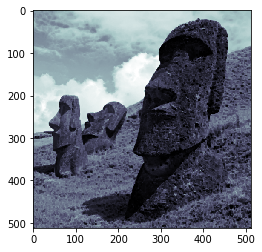

In [31]:
min_filtering(image,onemask3)    #3X3

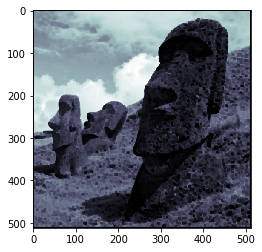

In [32]:
min_filtering(image,onemask5)    #5X5

## 2. Take a gray scale image and add salt and pepper noise. Write programs for following operations and observe their outputs

In [33]:
n_image = plt.imread("easter.jpg")
n_image = cv2.cvtColor(n_image, cv2.COLOR_BGR2GRAY)

In [34]:
import random

sp_image = np.zeros(n_image.shape)
prob = 0.05
thres = 1 - prob

for i in range(n_image.shape[0]):
    for j in range(n_image.shape[1]):
        rdn = random.random()
        if rdn<prob:
            sp_image[i][j]=0
        elif rdn>thres:
            sp_image[i][j] = 255
        else:
            sp_image[i][j] = n_image[i][j]

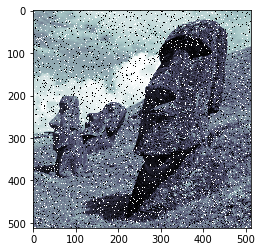

In [35]:
plt.imshow(sp_image, cmap=plt.cm.bone)

## a. Linear smoothing or Image averaging

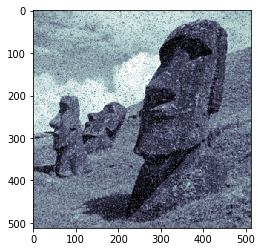

In [36]:
average_filtering(sp_image,mask1)     #3x3

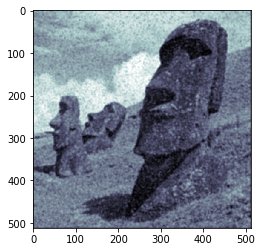

In [37]:
average_filtering(sp_image,mask2)        #5x5

## b. Weighted averaging

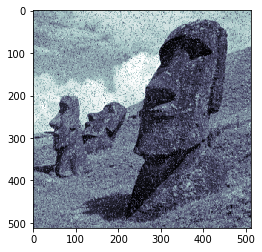

In [38]:
average_filtering(sp_image, w_mask3)    #3x3

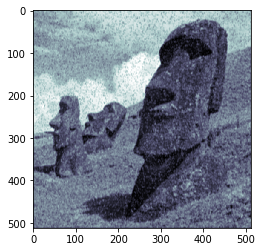

In [39]:
average_filtering(sp_image, w_mask5)    #5x5

## c. Median filtering

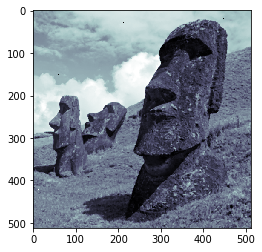

In [40]:
median_filtering(sp_image,onemask3)     #3X3

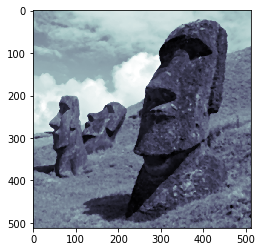

In [41]:
median_filtering(sp_image,onemask5)     #5x5

## d. Max filtering

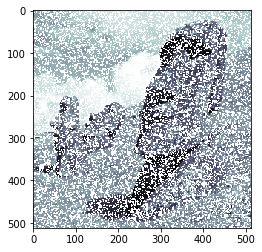

In [42]:
max_filtering(sp_image, onemask3)       #3X3

## e. Min filtering

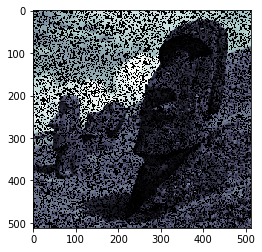

In [43]:
min_filtering(sp_image, onemask3)       #3X3

## 3. Write programs to perform following sharpening operations on a gray scale image

## a. Laplacian filter

In [44]:
lapfil = np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]])

In [45]:
lapfil

matrix([[ 0, -1,  0],
        [-1,  4, -1],
        [ 0, -1,  0]])

In [46]:
def filtering(img,mask):
    m,n = mask.shape
    new = np.zeros((row+m-1,col+n-1))             
    
    n = n//2
    m = m//2
    
    res = np.zeros(img.shape)
    
    new[m:new.shape[0]-m,n:new.shape[1]-n] = img     #zero-padded image
    
    for i in range(m, new.shape[0]-m):
        for j in range(n, new.shape[1]-n):
            temp = new[i-m:i+m+1, j-m:j+m+1]
            result = temp*mask
            res[i-m,j-n] = result.sum()
             
    return res

In [47]:
blurimg = filtering(image, mask3)

Blurred Image


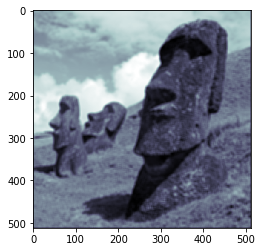

In [48]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [49]:
edged = filtering(blurimg, lapfil)

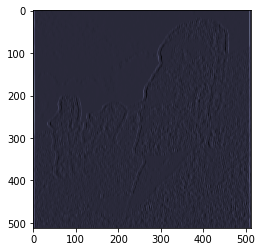

In [50]:
plt.imshow(edged, cmap=plt.cm.bone)

In [51]:
lapimage = blurimg+edged

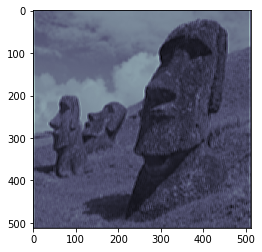

In [52]:
plt.imshow(lapimage, cmap=plt.cm.bone)

In [53]:
scale_lap = lapimage

In [54]:
#Scaling

for i in range(0,lapimage.shape[0]):
    for j in range(0,lapimage.shape[1]):
        if lapimage[i][j]>255:
            #print(d_lapimage[i][j])
            scale_lap[i][j] = lapimage[i][j] - 255

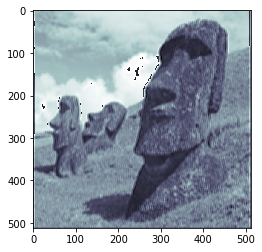

In [55]:
plt.imshow(scale_lap, cmap=plt.cm.bone)

## b. Filtering using composite mask

In [56]:
compimage = blurimg + scale_lap     #adding to the original image

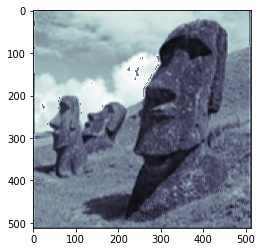

In [57]:
plt.imshow(compimage, cmap=plt.cm.bone)

## c. Unsharp masking

In [58]:
unsharp_mask = np.matrix([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [59]:
unsharp_mask

matrix([[ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]])

Blurred Image


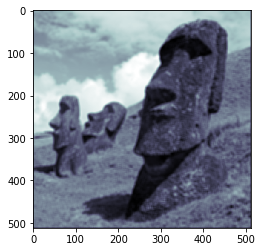

In [60]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [61]:
unsharp_edged = filtering(blurimg, unsharp_mask)

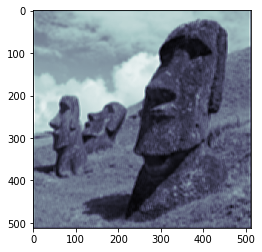

In [62]:
plt.imshow(unsharp_edged, cmap=plt.cm.bone)

## d. High boost filtering

In [63]:
hb_mask2 = np.matrix([[0,-1,0],[-1,6,-1],[0,-1,0]])          #hb mask with A = 2
hb_mask3 = np.matrix([[0,-1,0],[-1,7,-1],[0,-1,0]])          #hb mask with A = 3
hb_mask4 = np.matrix([[0,-1,0],[-1,8,-1],[0,-1,0]])          #hb mask with A = 4

Blurred Image


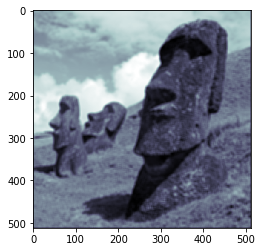

In [64]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

#### A = 2

In [65]:
hb_edged2 = filtering(blurimg, hb_mask2)

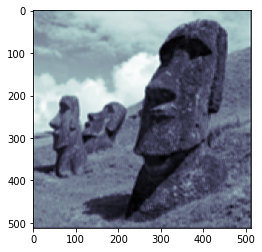

In [66]:
plt.imshow(hb_edged2, cmap=plt.cm.bone)

#### A = 3

In [67]:
hb_edged3 = filtering(blurimg, hb_mask3)

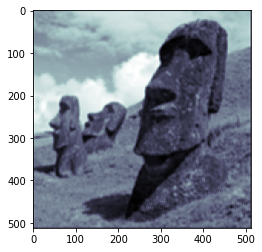

In [68]:
plt.imshow(hb_edged3, cmap=plt.cm.bone)

#### A = 4

In [69]:
hb_edged4 = filtering(blurimg, hb_mask4)

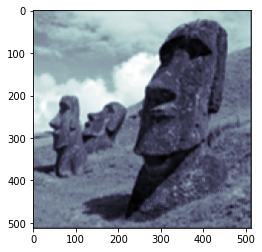

In [70]:
plt.imshow(hb_edged4, cmap=plt.cm.bone)

## e. Filtering using first order derivative operators such as sobel and prewitt mask

### Sobel Mask

In [71]:
sobel = np.matrix([[-1,-2,-1],[0,0,0],[1,2,1]])

Blurred Image


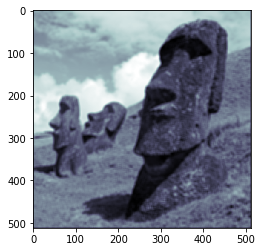

In [72]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [73]:
sobel_filter = filtering(blurimg, sobel)

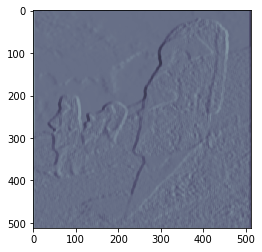

In [74]:
plt.imshow(sobel_filter, cmap=plt.cm.bone)

### Prewitt Mask

In [75]:
prewitt = np.matrix([[-1,-1,-1],[0,0,0],[1,1,1]])

Blurred Image


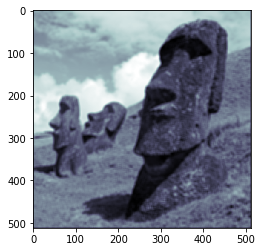

In [76]:
plt.imshow(blurimg, cmap=plt.cm.bone)
print("Blurred Image")

In [77]:
prewitt_filter = filtering(blurimg, prewitt)

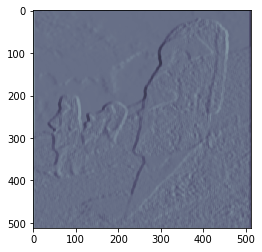

In [78]:
plt.imshow(prewitt_filter, cmap=plt.cm.bone)